In [8]:
import pandas as pd
import numpy as np
import nltk
import csv
import re 

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import os
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from keras import utils
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data['v2'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [12]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns

Index(['v1', 'v2'], dtype='object')

In [14]:
data.shape

(5572, 2)

In [15]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
data.isna().sum()


v1    0
v2    0
dtype: int64

In [17]:
data.duplicated().sum()

403

In [18]:
data=data.drop_duplicates()

In [19]:
data.duplicated().sum()

0

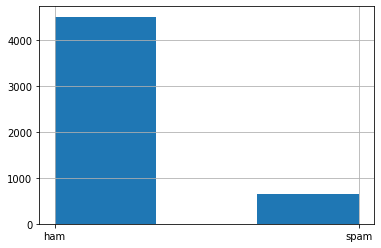

In [20]:
data['v1'].hist(bins=3)

In [21]:
data['alpha_text'] = data['v2'].apply(lambda x: re.sub(r'[^a-zA-Z ]+', '', x.lower()))
data.head()  #Removing special characters

,v1,v2,alpha_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [22]:
nltk.download('stopwords')
data['imp_text'] = data['alpha_text'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
data.head()  #Removing stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,alpha_text,imp_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though


In [23]:
# Convert text into numbers(vector)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [24]:
x = cv.fit_transform(data).toarray()
x

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

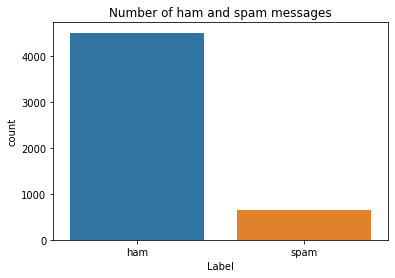

In [25]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [26]:
X = data.v2
Y = data.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [28]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)

In [29]:
sequences_matrix.shape

(4393, 150)

In [30]:
sequences_matrix.ndim

2

In [31]:
sequences_matrix = np.reshape(sequences_matrix,(4393,150,1))

In [32]:
sequences_matrix.ndim

3

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [34]:
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))

In [35]:
model.add(LSTM(units=64,input_shape = (sequences_matrix.shape[1],1),return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
M = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 43s 1s/step - loss: 0.4551 - accuracy: 0.8418 - val_loss: 0.3320 - val_accuracy: 0.8760
Epoch 2/5
28/28 [==============================] - 30s 1s/step - loss: 0.1810 - accuracy: 0.9382 - val_loss: 0.0966 - val_accuracy: 0.9693
Epoch 3/5
28/28 [==============================] - 30s 1s/step - loss: 0.0703 - accuracy: 0.9809 - val_loss: 0.0794 - val_accuracy: 0.9784
Epoch 4/5
28/28 [==============================] - 30s 1s/step - loss: 0.0488 - accuracy: 0.9883 - val_loss: 0.0894 - val_accuracy: 0.9716
Epoch 5/5
28/28 [==============================] - 30s 1s/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0780 - val_accuracy: 0.9738


In [39]:
model.save('spam-classifier.h5')

In [40]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)

In [41]:
accr = model.evaluate(test_sequences_matrix,Y_test)

25/25 [==============================] - 4s 85ms/step - loss: 0.0840 - accuracy: 0.9768


In [42]:
print("Accuracy of the model on Testing Data is - " , accr[1]*100 , "%")

Accuracy of the model on Testing Data is -  97.68041372299194 %


In [43]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.084
  Accuracy: 0.977
